# Constraint-based modelling with COBRApy
## PART II
#### Tiago Machado & Nadine Topfer

## Question 1 - *Escherichia coli* model loading and initial exploration 

### 1 - Load the iJO1366 E.Coli model directly through COBRApy.

### 1.1 What is the objective function? How many compartments are contained within the model and what are their names?

In [1]:
import cobra
from cobra.io import load_model

model = load_model("iJO1366")

In [2]:
model

Name,iJO1366
Memory address,7fe3d11768d0
Number of metabolites,1805
Number of reactions,2583
Number of genes,1367
Number of groups,37
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


In [3]:
objective_name = list(cobra.util.linear_reaction_coefficients(model).keys())[0].id
print("The ID of the objective funtion reaction is {}.".format(objective_name))
#print("The model contains {} metabolites.".format(len(model.metabolites)))
#print("The model contains {} reactions.".format(len(model.reactions)))
print("The model contains {} compartments. The compartments are the {}, {} and {}.".format(len(list(model.compartments.keys())), list(model.compartments.values())[0], list(model.compartments.values())[1], list(model.compartments.values())[2]))

The ID of the objective funtion reaction is BIOMASS_Ec_iJO1366_core_53p95M.
The model contains 3 compartments. The compartments are the cytosol, extracellular space and periplasm.


### 1.2 What metabolites are used as a reactant in the 'Adenylate kinase' reaction? And as products? What are their stoichiometries? Is this reaction mass-balanced?

In [4]:
test_reaction = model.reactions.query('Adenylate kinase', 'name')[0]
print(test_reaction.name,test_reaction.build_reaction_string())

Adenylate kinase amp_c + atp_c <=> 2.0 adp_c


In [5]:
print(f"The {test_reaction.name} reaction has the metabolites {test_reaction.reactants[0].name} and {test_reaction.reactants[1].name} as reactants, and the metabolite {test_reaction.products[0].name} as a product.")

The Adenylate kinase reaction has the metabolites AMP C10H12N5O7P and ATP C10H12N5O13P3 as reactants, and the metabolite ADP C10H12N5O10P2 as a product.


In [6]:
print(f'The stoichiometric coefficient for {test_reaction.reactants[0].name} is {test_reaction.get_coefficient(test_reaction.reactants[0].id)}, for {test_reaction.reactants[1].name} is {test_reaction.get_coefficient(test_reaction.reactants[1].id)} and for {test_reaction.products[0].name} is {test_reaction.get_coefficient(test_reaction.products[0].id)}')

The stoichiometric coefficient for AMP C10H12N5O7P is -1.0, for ATP C10H12N5O13P3 is -1.0 and for ADP C10H12N5O10P2 is 2.0


In [7]:
mass_balance_test = test_reaction.check_mass_balance()

if mass_balance_test == {}:
    print('The reaction is balanced')
else:
    print('The reactions is unbalanced')

The reaction is balanced


### 1.3 What are the names of the reactions in the model that have the metabolite with the formula 'C4H2O5' as a substrate? And as a product?

In [8]:
oaa = model.metabolites.query('C4H2O5', 'formula')[0]
oaa

Metabolite identifier,oaa_c
Name,Oxaloacetate
Memory address,0x7fe4114a5210
Formula,C4H2O5
Compartment,c
In 13 reaction(s),"MDH, CITL, PPCK, DTARTD, MDH3, MDH2, OAADC, ASPTA, PPC, TARTD, MOX, CS, MCITS"


In [9]:
for reaction in oaa.reactions:
    print(reaction)

MDH: mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
CITL: cit_c --> ac_c + oaa_c
PPCK: atp_c + oaa_c --> adp_c + co2_c + pep_c
DTARTD: tartr__D_c --> h2o_c + oaa_c
MDH3: mal__L_c + mqn8_c --> mql8_c + oaa_c
MDH2: mal__L_c + q8_c --> oaa_c + q8h2_c
OAADC: h_c + oaa_c --> co2_c + pyr_c
ASPTA: akg_c + asp__L_c <=> glu__L_c + oaa_c
PPC: co2_c + h2o_c + pep_c --> h_c + oaa_c + pi_c
TARTD: tartr__L_c --> h2o_c + oaa_c
MOX: mal__L_c + o2_c <=> h2o2_c + oaa_c
CS: accoa_c + h2o_c + oaa_c --> cit_c + coa_c + h_c
MCITS: h2o_c + oaa_c + ppcoa_c --> 2mcit_c + coa_c + h_c


In [10]:
consumers = []
producers = []
both = []

for reaction in oaa.reactions:
    if oaa in reaction.products:
        producers.append(reaction.name)
    elif oaa in reaction.reactants:
        consumers.append(reaction.name)
    else: both.append(reaction.name)

print(f'There are {len(producers)} oxaloacetate producing reactions')
print(producers)
print()
print(f'There are {len(consumers)} oxaloacetate consuming reactions')
print(consumers)
print()
print(f'There are {len(both)} reactions that both consume and produce oxaloacetate')
print(both)


There are 9 oxaloacetate producing reactions
['Malate dehydrogenase', 'Citrate lyase', 'D(-)-tartrate dehydratase', 'Malate dehydrogenase (menaquinone 8 as acceptor)', 'Malate dehydrogenase (ubiquinone 8 as acceptor)', 'Aspartate transaminase', 'Phosphoenolpyruvate carboxylase', 'L(+)-tartrate dehydratase', 'Malate oxidase']

There are 4 oxaloacetate consuming reactions
['Phosphoenolpyruvate carboxykinase', 'Oxaloacetate decarboxylase', 'Citrate synthase', '2-methylcitrate synthase']

There are 0 reactions that both consume and produce oxaloacetate
[]


In [11]:
print("The reactions that have oxaloacetate as a substrate are {} .".format(consumers))
print()
print("The reactions that have oxaloacetate as a product are {} .".format(producers))

The reactions that have oxaloacetate as a substrate are ['Phosphoenolpyruvate carboxykinase', 'Oxaloacetate decarboxylase', 'Citrate synthase', '2-methylcitrate synthase'] .

The reactions that have oxaloacetate as a product are ['Malate dehydrogenase', 'Citrate lyase', 'D(-)-tartrate dehydratase', 'Malate dehydrogenase (menaquinone 8 as acceptor)', 'Malate dehydrogenase (ubiquinone 8 as acceptor)', 'Aspartate transaminase', 'Phosphoenolpyruvate carboxylase', 'L(+)-tartrate dehydratase', 'Malate oxidase'] .


### 1.4 How many pathways are represented within the model? Which is the pathway that agregates the largest number of reactions?

In [12]:
print(f'The model contains information about {len(model.groups)} pathways')

The model contains information about 37 pathways


In [13]:
group_len = []
group_name = []

for x in model.groups:
    group_len.append(len(x.members))
    group_name.append(x.name)

In [14]:
import pandas as pd

pathways = pd.DataFrame(list(zip(group_len, group_name)), columns=['Lenght', 'Name'])

pathways.sort_values('Lenght', inplace=True, ascending=False)

pathways

,Lenght,Name
0,332,"Transport, Inner Membrane"
1,271,"Transport, Outer Membrane Porin"
4,246,Glycerophospholipid Metabolism
6,219,Cofactor and Prosthetic Group Biosynthesis
5,195,Alternate Carbon Metabolism
3,139,Nucleotide Salvage Pathway
7,134,Cell Envelope Biosynthesis
21,112,Inorganic Ion Transport and Metabolism
16,71,Lipopolysaccharide Biosynthesis / Recycling
28,52,Oxidative Phosphorylation


In [15]:
print('The pathway in the model with the largest number of reactions is the {} pathway, which contains {} reactions'.format(pathways.loc[0, 'Name'], pathways.loc[0, 'Lenght']))

The pathway in the model with the largest number of reactions is the Transport, Inner Membrane pathway, which contains 332 reactions


## Question 2 - Flux Simulation 

### 2 - Constrain D-Glucose uptake to 20 mmol/(gDW·h) and obtain an aerobic and anaerobic flux solution using FBA.

In [16]:
with model:
    model.reactions.EX_glc__D_e.lower_bound = -20
    aerobic = (model.optimize())
    model.reactions.EX_o2_e.lower_bound = 0
    anaerobic = (model.optimize())

In [17]:
print('Aerobic Flux Solution: ')
print()
aerobic

Aerobic Flux Solution: 



,fluxes,reduced_costs
DM_4crsol_c,0.000441,0.000000
DM_5drib_c,0.000445,0.000000
DM_aacald_c,0.000000,0.000000
DM_amob_c,0.000004,0.000000
DM_mththf_c,0.000886,0.000000
...,...,...
ZN2abcpp,0.000000,-0.008295
ZN2t3pp,0.000000,-0.002074
ZN2tpp,0.000674,0.000000
ZNabcpp,0.000000,-0.008295


In [18]:
print('Anaerobic Flux Solution: ')
print()
anaerobic

Anaerobic Flux Solution: 



,fluxes,reduced_costs
DM_4crsol_c,0.000115,0.000000
DM_5drib_c,0.000347,0.000000
DM_aacald_c,0.000000,-0.257896
DM_amob_c,0.000001,0.000000
DM_mththf_c,0.000232,0.000000
...,...,...
ZN2abcpp,0.000000,-0.022105
ZN2t3pp,0.000000,-0.005526
ZN2tpp,0.000177,0.000000
ZNabcpp,0.000000,-0.022105


### 2.1 - Provide values for the objective function in each scenario.

In [19]:
print(f"The biomass production flux value in the aerobic scenario is {aerobic.objective_value} mmol/(gDW h), while the flux in the anaerobic scenario is {anaerobic.objective_value} mmol/(gDW h).")

The biomass production flux value in the aerobic scenario is 1.9778087350595441 mmol/(gDW h), while the flux in the anaerobic scenario is 0.5178191281465815 mmol/(gDW h).


### 2.2 - For the aerobic and anaerobic flux solutions please provide the IDs of the reactions with the 10 lowest reaction fluxes and 10 highest reaction fluxes.

In [20]:
aerobic_data = aerobic.to_frame()
reaction_names = []

#Get the reaction names
for ID in aerobic_data.index:
    reaction_names.append(model.reactions.get_by_id(ID).name)

aerobic_data.index = reaction_names

aerobic_data.sort_values('fluxes', inplace=True)

In [21]:
print('The 10 lowest flux solutions in the aerobic scenario are: ')
print()
print(aerobic_data['fluxes'][0:10])

The 10 lowest flux solutions in the aerobic scenario are: 

H2O transport via diffusion (periplasm)                       -91.047606
H2O transport via diffusion (extracellular to periplasm)      -91.047606
CO2 transporter via diffusion (periplasm)                     -38.814144
CO2 transport via diffusion (extracellular to periplasm)      -38.814144
O2 exchange                                                   -34.593686
Phosphoglycerate kinase                                       -32.446807
Phosphoglycerate mutase                                       -29.048591
Ammonia exchange                                              -21.361964
D-Glucose exchange                                            -20.000000
Proton transport via diffusion (extracellular to periplasm)   -18.172566
Name: fluxes, dtype: float64


In [22]:
anaerobic_data = anaerobic.to_frame()
reaction_names = []


#Get the reaction names
for ID in anaerobic_data.index:
    reaction_names.append(model.reactions.get_by_id(ID).name)

anaerobic_data.index = reaction_names

anaerobic_data.sort_values('fluxes', inplace=True)

In [23]:
print('The 10 lowest flux solutions in the anaerobic scenario are: ')
print()
anaerobic_data['fluxes'][0:10]

The 10 lowest flux solutions in the anaerobic scenario are: 



Proton transport via diffusion (extracellular to periplasm)    -55.437366
Phosphoglycerate kinase                                        -38.753218
Phosphoglycerate mutase                                        -37.891791
Formate transport via diffusion (extracellular to periplasm)   -34.174990
D-Glucose exchange                                             -20.000000
Acetate transport via diffusion (extracellular to periplasm)   -16.156867
Acetate reversible transport via proton symport (periplasm)    -16.156867
Acetaldehyde dehydrogenase (acetylating)                       -15.878206
Alcohol dehydrogenase (ethanol)                                -15.878206
Ethanol reversible transport via diffusion (periplasm)         -15.878206
Name: fluxes, dtype: float64

### 3 - Perform a pFBA simulation of the *E. coli* core model under aerobic and anaerobic conditions. Provide the flux value for biomass reaction in each scenario.

In [24]:
with model:
    model.reactions.EX_glc__D_e.lower_bound = -20
    aerobic_pFBA = cobra.flux_analysis.pfba(model)
    model.reactions.EX_o2_e.lower_bound = 0
    anaerobic_pFBA = cobra.flux_analysis.pfba(model)

print(f"The biomass production flux value in the aerobic scenario is {aerobic_pFBA.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']} mmol/(gDW h), while the flux in the anaerobic scenario is {anaerobic_pFBA.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']} mmol/(gDW h).")

The biomass production flux value in the aerobic scenario is 1.9778087350595466 mmol/(gDW h), while the flux in the anaerobic scenario is 0.5178191281464756 mmol/(gDW h).


### 3.1 - Calculate the sum of absolute fluxes for the flux solutions obtained in question 3.

In [25]:
print(f"The sum of absolute fluxes in the aerobic scenario is {aerobic_pFBA.objective_value} mmol/(gDW h), while the total absolute sum of fluxes in the anaerobic scenario is {anaerobic_pFBA.objective_value} mmol/(gDW h).")

The sum of absolute fluxes in the aerobic scenario is 1386.5673292018391 mmol/(gDW h), while the total absolute sum of fluxes in the anaerobic scenario is 796.6630109941966 mmol/(gDW h).


### 3.2 - Calculate the sum of absolute fluxes for the flux solutions obtained in question 2. Compare with the values obtained from question 3.1. Which of the two sets has a lower sum of fluxes.

In [26]:
FBA_Aerobic_SoF = 0
FBA_Anaerobic_SoF = 0

#Sum of the absolute value of all fluxes in the flux solution

for value in aerobic.fluxes:
    FBA_Aerobic_SoF += abs(value)

for value in anaerobic.fluxes:
    FBA_Anaerobic_SoF += abs(value)

print(f"The FBA solution had a total absolute sum of fluxes of {FBA_Aerobic_SoF} mmol/(gDW h) in the aerobic scenario and {FBA_Anaerobic_SoF} in the anaerobic scenario")

The FBA solution had a total absolute sum of fluxes of 1408.5111621495853 mmol/(gDW h) in the aerobic scenario and 816.1961737487977 in the anaerobic scenario


The flux solutions obtained via pFBA have a lower sum of absolute fluxes.

### 4 - Perform Flux Variability Analysis (FVA) for aerobic and anaerobic conditions.

In [27]:
from cobra.flux_analysis import flux_variability_analysis

with model:
    model.reactions.EX_glc__D_e.lower_bound = -20
    aerobic_fva = flux_variability_analysis(model)
    model.reactions.EX_o2_e.lower_bound = 0
    anaerobic_fva = flux_variability_analysis(model)

In [28]:
print('Aerobic Flux Variability Analysis: ')
print()
aerobic_fva

Aerobic Flux Variability Analysis: 



,minimum,maximum
DM_4crsol_c,0.000441,4.410513e-04
DM_5drib_c,0.000445,4.450070e-04
DM_aacald_c,0.000000,0.000000e+00
DM_amob_c,0.000004,3.955617e-06
DM_mththf_c,0.000886,8.860583e-04
...,...,...
ZN2abcpp,0.000000,8.832174e-13
ZN2t3pp,0.000000,1.928692e-11
ZN2tpp,0.000674,6.744328e-04
ZNabcpp,0.000000,2.790417e-12


In [29]:
print('Anaerobic Flux Variability Analysis: ')
print()
anaerobic_fva

Anaerobic Flux Variability Analysis: 



,minimum,maximum
DM_4crsol_c,0.000115,1.154737e-04
DM_5drib_c,0.000347,3.474566e-04
DM_aacald_c,0.000000,0.000000e+00
DM_amob_c,0.000001,1.035638e-06
DM_mththf_c,0.000232,2.319830e-04
...,...,...
ZN2abcpp,0.000000,-6.445233e-12
ZN2t3pp,0.000000,-7.213521e-12
ZN2tpp,0.000177,1.765763e-04
ZNabcpp,0.000000,-8.338208e-12


### 4.1 - For the aerobic and anaerobic scenarios, indicate the IDs of the 20 reactions with the highest flux variablitiy

In [30]:
#Flux variability can be obtained by summing the absolute values for the minimum and maximum flux value of each reaction

aerobic_fva['diff'] = abs(aerobic_fva['minimum']) +  abs(aerobic_fva['maximum'])
aerobic_fva.sort_values('diff', inplace=True, ascending=False)

anaerobic_fva['diff'] = abs(anaerobic_fva['minimum']) +  abs(anaerobic_fva['maximum'])
anaerobic_fva.sort_values('diff', inplace=True, ascending=False)

In [31]:
print("The 20 reactions with highest flux variability in the aerobic scenario are: ")
print()
print(list(aerobic_fva.index)[0:20])

The 20 reactions with highest flux variability in the aerobic scenario are: 

['ADK1', 'NDPK1', 'ADK3', 'VALTA', 'VPAMTr', 'ALATA_L', 'PPK', 'SUCOAS', 'FE2tex', 'EX_fe2_e', 'CAt6pp', 'PPM', 'PRPPS', 'PROt2rpp', 'GLUt2rpp', 'ASPt2pp_copy2', 'THRt2rpp', 'PTA2', 'TRSARr', 'CRNDt2rpp']


In [32]:
print("The 20 reactions with highest flux variability in the anaerobic scenario are: ")
print()
print(list(anaerobic_fva.index)[0:20])

The 20 reactions with highest flux variability in the anaerobic scenario are: 

['ADK1', 'NDPK1', 'ADK3', 'VPAMTr', 'VALTA', 'ALATA_L', 'ACt2rpp', 'PTAr', 'ACKr', 'PPK', 'CAt6pp', 'GLYCLTt2rpp', 'PPM', 'PRPPS', 'CRNDt2rpp', 'GLUt2rpp', 'SUCOAS', 'GLUABUTt7pp', 'INDOLEt2rpp', 'GLCtex_copy1']


### 4.2 - Perform FVA for aerobic and anaerobic conditions with the added constraint that the sum of absolute fluxes must not be more than 10% larger than the sum of absolute fluxes of a pFBA flux solution. 

In [33]:
with model:
    model.reactions.EX_glc__D_e.lower_bound = -20
    aerobic_solution = flux_variability_analysis(model, pfba_factor= 1.1)
    model.reactions.EX_o2_e.lower_bound = 0
    anaerobic_solution = flux_variability_analysis(model, pfba_factor= 1.1)


In [34]:
print('Aerobic Flux Variability Analysis (with pFBA constraint): ')
print()
aerobic_solution

Aerobic Flux Variability Analysis (with pFBA constraint): 



,minimum,maximum
DM_4crsol_c,0.000441,4.410513e-04
DM_5drib_c,0.000445,4.450070e-04
DM_aacald_c,0.000000,0.000000e+00
DM_amob_c,0.000004,3.955617e-06
DM_mththf_c,0.000886,8.860583e-04
...,...,...
ZN2abcpp,0.000000,8.204113e-13
ZN2t3pp,0.000000,1.543461e-11
ZN2tpp,0.000674,6.744328e-04
ZNabcpp,0.000000,3.935957e-12


In [35]:
print('Anaerobic Flux Variability Analysis (with pFBA constraint): ')
print()
anaerobic_fva

Anaerobic Flux Variability Analysis (with pFBA constraint): 



,minimum,maximum,diff
ADK1,-1000.000000,1000.000000,2000.000000
NDPK1,-999.590599,1000.000000,1999.590599
ADK3,-1000.000000,999.590599,1999.590599
VPAMTr,-999.780879,999.698963,1999.479841
VALTA,-1000.000000,999.479841,1999.479841
...,...,...,...
HDCAtexi,0.000000,0.000000,0.000000
HCYSMT2,0.000000,0.000000,0.000000
PFK_2,0.000000,0.000000,0.000000
EX_fecrm_un_e,0.000000,0.000000,0.000000


## Bonus Questions 

### 1 - Obtain an aerobic and anaerobic flux solution using succinate as the sole carbon source. What are the differences between the two flux solutions? How may they be explained at the level of the metabolic network? 

In [36]:
# Searching for succinate
model.reactions.query("succ")

[<Reaction EX_succ_e at 0x7fe410d82890>]

In [37]:
model.reactions.EX_succ_e

Reaction identifier,EX_succ_e
Name,Succinate exchange
Memory address,0x7fe410d82890
Stoichiometry,succ_e --> Succinate -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [38]:
#Aerobic solution with succinate as the carboun source
with model:
    model.reactions.EX_glc__D_e.lower_bound = 0
    model.reactions.EX_succ_e.lower_bound = -20
    print(model.summary())

Objective
1.0 BIOMASS_Ec_iJO1366_core_53p95M = 0.9985348955292406

Uptake
------
Metabolite     Reaction      Flux  C-Number  C-Flux
     ca2_e     EX_ca2_e  0.005197         0   0.00%
      cl_e      EX_cl_e  0.005197         0   0.00%
 cobalt2_e EX_cobalt2_e 2.496E-05         0   0.00%
     cu2_e     EX_cu2_e  0.000708         0   0.00%
     fe2_e     EX_fe2_e   0.01604         0   0.00%
       h_e       EX_h_e     30.83         0   0.00%
       k_e       EX_k_e    0.1949         0   0.00%
     mg2_e     EX_mg2_e  0.008662         0   0.00%
     mn2_e     EX_mn2_e   0.00069         0   0.00%
    mobd_e    EX_mobd_e 0.0001288         0   0.00%
     nh4_e     EX_nh4_e     10.78         0   0.00%
     ni2_e     EX_ni2_e 0.0003225         0   0.00%
      o2_e      EX_o2_e     26.88         0   0.00%
      pi_e      EX_pi_e    0.9632         0   0.00%
     so4_e     EX_so4_e    0.2518         0   0.00%
    succ_e    EX_succ_e        20         4 100.00%
     zn2_e     EX_zn2_e 0.0003405  

In [39]:
#Anaerobic solution with succinate as the carbon source
with model:
    model.reactions.EX_glc__D_e.lower_bound = 0
    model.reactions.EX_succ_e.lower_bound = -20
    model.reactions.EX_o2_e.lower_bound = 0
    print(model.summary())

Infeasible: None (infeasible).

Possible causes for the inability of the model generating a flux solution in an anaerobic scenario using succinate as a substrate are three-fold:

- **Energetic Constraints**:

Biomass production is an energetically demanding process, requiring a sufficient supply of ATP and reducing equivalents. Succinate may not provide enough energy to meet these requirements, especially under anaerobic conditions where oxidative phosphorylation is limited.

- **Redox Balance**:

Anaerobic conditions often require the cell to balance redox equivalents without the use of oxygen as a terminal electron acceptor. Succinate might not provide the necessary balanced pool of reducing equivalents (NADH and NADPH) needed for biosynthesis.

- **Metabolic Pathway Limitations**:

The pathways connected to succinate metabolism may not be sufficient to produce all the precursor metabolites and cofactors required for biomass synthesis in the absence of oxidative phosphorylation. Additional carbon sources or pathways may be needed to fulfill these demands.

### 2 - Using FBA obtain flux solutions with the *E. coli* model corresponding to glucose uptake values of 15, 50, 100, 1000 mmol/(gDW·h). Is the increase in biomass linear or non-linear? What can justify this behaviour? 

In [40]:
glucose_uptake = [5, 50, 100, 300, 500, 800, 1000]

Biomass = []

for flux_bound in glucose_uptake:
    with model:
        model.reactions.EX_glc__D_e.lower_bound = -flux_bound
        solution = model.optimize()
        Biomass.append(solution.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"])

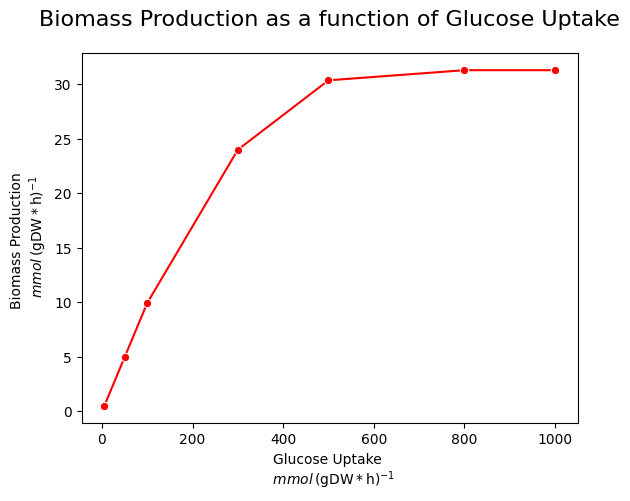

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = glucose_uptake, y = Biomass, color = 'red', marker="o")
ax.set(xlabel= 'Glucose Uptake \n  $mmol\, \mathregular{(gDW*h)^{-1}}$', 
ylabel= "Biomass Production \n $mmol\, \mathregular{(gDW*h)^{-1}}$")
ax.set_title('Biomass Production as a function of Glucose Uptake', fontsize=16, pad = 20, ha='center' )
plt.show()

Using FBA we use linear programming to resolve a constrained optimization, resulting in a flux solution. However, despite the linear nature of the problem, we can simulate non-linear behaviour such as the one observed above for the relationship between biomass production and glucose uptake in *E.coli*. This can occur due to the limitations imposed by the strucutre of the metabolic network (the stoichiometric matrix) i.e not all reactions are connected to all metabolites. This exemplifies the power of relatively simple methodologies simulating complex biological behaviour.